* Name: Siddharth Gupta
* Roll Number: 12041450
* References Used to Complete the Assignment
    * a.https://www.kaggle.com/code/giorgichkhitunidze/task-for-the-internship
    * b.https://www.kaggle.com/code/nikanatsvlishvili/eda-map-visualization-6-model
    * c. https://plotly.com/python/

...


# Part 1: NY Taxi Fare Prediction

In [83]:
!pip install -q kaggle

In [84]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"siddharth2002","key":"06a53f2313a0140d113652d3de816f77"}'}

In [85]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [86]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

new-york-city-taxi-fare-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [87]:
!unzip new-york-city-taxi-fare-prediction

Archive:  new-york-city-taxi-fare-prediction.zip
replace GCP-Coupons-Instructions.rtf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: GCP-Coupons-Instructions.rtf  
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [88]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [89]:
train = pd.read_csv("/content/train.csv", nrows = 1000000)
test = pd.read_csv("/content/test.csv")

PART 1 --> DATA CLEANSING 

Will perform the following activities
1.   Shape of train and test sets
2.   Check for NaNs and drop them (if any)
3.   Check for outliers and drop them (if any)
4.   Type conversion of relevant fields





In [90]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [91]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))

Shape of the Training data : (1000000, 8)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [92]:
# Check datatypes & count of not-null values in each field
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [93]:
#check for missing values in train data
nu = train.isnull().sum()
print(nu)

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64


In [94]:
#check for missing values in test data
nu = test.isnull().sum()
print(nu)

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [95]:
#drop the missing values
train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
train.reset_index()



,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...,...
999985,999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999986,999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999987,999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999988,999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


In [96]:
#check the target column
nu = train.isnull().sum()
print(nu)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [97]:
#Look for no. of non-positive fare_amount values.
count = 0
for i in train['fare_amount']:
  if i <= 0:
    count += 1
  
print(count)

67


In [98]:
print(train.columns)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


In [99]:

# Remove the non-positive fare_amount values.
train.drop(train.index[train['fare_amount']<=0.5], inplace = True)


In [100]:
train = train.drop(train[(train.pickup_longitude < -180) | (train.pickup_longitude > 180)].index, axis=0)
train = train.drop(train[(train.pickup_latitude < -90) | (train.pickup_latitude > 90)].index, axis=0)
train = train.drop(train[(train.dropoff_longitude < -180) | (train.dropoff_longitude > 180)].index, axis=0)
train = train.drop(train[(train.dropoff_latitude < -90) | (train.dropoff_latitude > 90)].index, axis=0)

In [101]:
count = 0
for i in train['fare_amount']:
  if i <= 0:
    count += 1
    
  
print(count)

0


In [102]:
print("max in fare",max(train['fare_amount']))
print("min in fare",min(train['fare_amount']))
print("max in passengers",max(train['passenger_count']))

max in fare 500.0
min in fare 1.5
max in passengers 208


In [103]:
train = train.drop(train[train.passenger_count>=6].index, axis = 0)

In [104]:
train.shape

(978681, 8)

the latitude and longitude range of new york is 40.730610, and the longitude is -73.935242. 

In [105]:
print("min in latitude",min(train['pickup_latitude']))
print("min in latitude",min(train['dropoff_latitude']))
print("max in longitude",max(train['pickup_longitude']))
print("max in longitude",max(train['dropoff_longitude']))

min in latitude -74.016587
min in latitude -74.035197
max in longitude 40.850357
max in longitude 45.581619


we can see that some values might have been interchange between longitude and latitude so we have to drop them


In [106]:
train[(train.pickup_longitude>=40)] #replacing these values in the correct columns

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2147,2013-05-24 14:54:00.00000079,5.00,2013-05-24 14:54:00 UTC,40.751582,-73.986968,40.758867,-73.978353,2
3827,2013-06-20 04:28:00.0000001,11.00,2013-06-20 04:28:00 UTC,40.719830,-73.988467,40.723305,-73.939430,1
4783,2013-05-22 06:28:00.0000004,6.50,2013-05-22 06:28:00 UTC,40.748262,-73.991840,40.740372,-73.979010,1
6705,2013-05-22 15:33:00.000000175,13.00,2013-05-22 15:33:00 UTC,40.766125,-73.983285,40.757417,-73.977962,2
7525,2013-05-22 10:54:00.000000140,13.00,2013-05-22 10:54:00 UTC,40.760495,-73.973047,40.740367,-73.994392,1
...,...,...,...,...,...,...,...,...
986508,2013-05-23 07:03:00.00000057,5.50,2013-05-23 07:03:00 UTC,40.787825,-73.955587,40.778122,-73.956358,2
988626,2013-05-23 23:32:00.000000174,12.50,2013-05-23 23:32:00 UTC,40.763232,-73.977723,40.729460,-74.005122,2
997498,2013-05-17 02:01:00.00000028,9.00,2013-05-17 02:01:00 UTC,40.725637,-73.977772,40.718682,-73.992730,1
997509,2013-05-22 01:13:00.00000047,9.00,2013-05-22 01:13:00 UTC,40.732562,-73.999285,40.709955,-74.015745,2


In [107]:
indx = train[(train.pickup_longitude>=40)].index
train.loc[indx,['dropoff_longitude','dropoff_latitude']] = train.loc[indx,['dropoff_latitude','dropoff_longitude']].values
train.loc[indx,['pickup_longitude','pickup_latitude']] = train.loc[indx,['pickup_latitude','pickup_longitude']].values

#this will replace the values of latitude to longitude and vice versa, wherever the values are altered./

In [108]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [109]:
print("max in latitude",max(train['pickup_latitude']))
print("min in latitude",max(train['dropoff_latitude']))
print("min in longitude",min(train['pickup_longitude']))
print("min in longitude",min(train['dropoff_longitude']))

max in latitude 69.4
min in latitude 81.510177
min in longitude -128.17595
min in longitude -121.391248


assuming to have a range of longitude from -72 to -75
and a range of latitude fro 40 to 42

In [110]:
train = train.drop(train[(train.pickup_longitude<-75) | (train.pickup_longitude>-72)].index, axis=0)
train = train.drop(train[(train.dropoff_longitude<-75) | (train.dropoff_longitude>-72)].index, axis=0)
train = train.drop(train[(train.pickup_latitude<40) | (train.pickup_latitude>42)].index, axis=0)
train = train.drop(train[(train.dropoff_latitude<40) | (train.dropoff_latitude>42)].index, axis=0)

In [111]:
train = train.drop(train[train.passenger_count<=0].index, axis = 0)

In [112]:


train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [113]:
#print("min in latitude",min(train['pickup_latitude']))
print("min in latitude",min(train['dropoff_latitude']))
print("max in longitude",max(train['pickup_longitude']))
print("max in longitude",max(train['dropoff_longitude']))

min in latitude 40.04118
max in longitude -72.70287
max in longitude -72.19609069824217


this is finally good cause we are only getting the values of longitude and latitude within our desired range

In [114]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [116]:


#plotting the e ditance against the fare amount
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x = []
y = []
df = train.drop(['pickup_datetime','key','passenger_count'],axis = 1)
fit = scaler.fit_transform(df)
scaler_df = pd.DataFrame(fit,columns= ['fare_amount', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
for i in range(len(df['fare_amount'])):
  row = scaler_df.iloc[i]
  x.append(abs((abs(row['pickup_latitude'])-abs(row['dropoff_latitude']))+(abs(row['pickup_longitude'])-abs(row['dropoff_longitude']))))
  y.append(row['fare_amount'])


  




In [117]:
scaler_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,0.004020,0.496113,0.382595,0.405557,0.356466
1,0.028945,0.420300,0.376864,0.355829,0.393503
2,0.006432,0.435005,0.405457,0.351503,0.376802
3,0.010452,0.433066,0.389362,0.351386,0.380801
4,0.005628,0.441469,0.409313,0.363998,0.394437


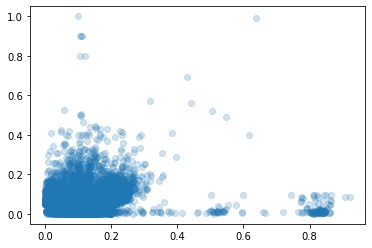

In [118]:
fig = plt.scatter(x,y,alpha = 0.2 )

plot between manhattan distance and the fare amount after normalization

**Next let us explore the pickup latitude and longitudes**, 

Googling gave me this info
*   Latitudes range from -90 to 90.
*   Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them


Check the data types of each column

In [119]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [120]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [121]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [122]:
#check the dtypes after conversion
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [123]:
test.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

Is this distance equal to the road travel distance? Do we have to do something else?


In [124]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [125]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

Now that we have calculated the distance, we shall create columns for the following -


*   year
*   month
*   date
*   hour
*   day of week






In [126]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [127]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


**1. Does the number of passengers affect the fare?**

**2. Does the date and time of pickup affect the fare?**

**3. Does the day of the week affect the fare?**

**4. Does the distance affect the fare?**

# Continue in a similar way for each of the parts

In [128]:
corr1 = train['fare_amount'].corr(train['passenger_count'])
corr2 = train['fare_amount'].corr(train['Hour'])
corr3 = train['fare_amount'].corr(train['Day of Week'])
corr4 = train['fare_amount'].corr(train['H_Distance'])
corr5 = train['fare_amount'].corr(train['pickup_longitude'])
corr6 = train['fare_amount'].corr(train['pickup_latitude'])
corr7 = train['fare_amount'].corr(train['dropoff_longitude'])

print("correlation b/w fare and #passengers",corr1)
print("correlation b/w fare and Hour",corr2)
print("correlation b/w fare and day of week",corr3)
print("correlation b/w fare and H distance",corr4)
print("correlation b/w fare and pick longitude",corr5)
print("correlation b/w fare and pick latitude",corr6)
print("correlation b/w fare and drop longitude",corr7)


correlation b/w fare and #passengers 0.006968867153985395
correlation b/w fare and Hour -0.019442095565686008
correlation b/w fare and day of week 0.0023541683309761217
correlation b/w fare and H distance 0.8104735772248137
correlation b/w fare and pick longitude 0.3714372839573176
correlation b/w fare and pick latitude -0.18403536924074093
correlation b/w fare and drop longitude 0.28639371586896045


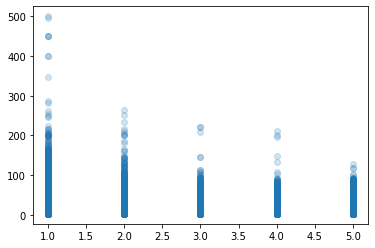

In [129]:
fig = plt.scatter(train['passenger_count'],train['fare_amount'],alpha = 0.2)

looks like that the highest price is charged while single user booked the taxi

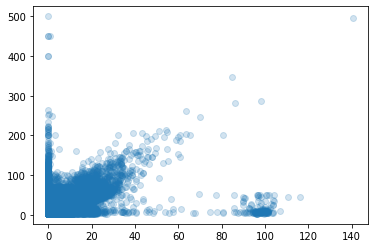

In [130]:
fig = plt.scatter(train['H_Distance'],train['fare_amount'],alpha = 0.2)

as we can see the fare amount is increasing as the distance is increasing

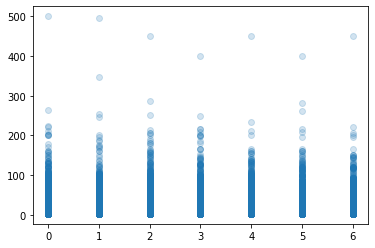

In [131]:
fig = plt.scatter(train['Day of Week'],train['fare_amount'],alpha = 0.2)

nothing unusual could be deducted here almost all are looking the same. though the max price keeps decreasing at the end of the week


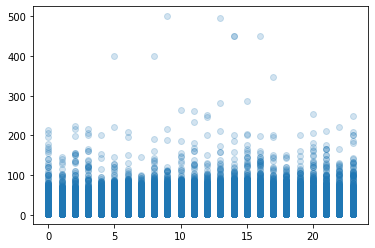

In [132]:
fig = plt.scatter(train['Hour'],train['fare_amount'],alpha = 0.2)

maximum value is been recorded around noon


In [133]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'Year', 'Month', 'Date', 'Day of Week',
       'Hour'],
      dtype='object')

In [134]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

In [135]:
#cross validation for linear regression
def cross(traink,k):
  
  ft_columns = ['fare_amount','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count','H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour' ]
  train = traink[ft_columns]
  ret = np.array_split(train,k)
  weights = []
  for i in range(k):
    ret[i] = pd.DataFrame(ret[i],columns=ft_columns)
  
  for i in range(k):
    print(i)
    great = ret[i]
    X_test = great.drop('fare_amount',axis =1)
    y_test = great['fare_amount']
    oops = pd.DataFrame(columns = ft_columns)
    for j in range(k):
      if j!=i:
        oops = oops.append(ret[j], ignore_index=True)
    X_train = oops
    y_train = X_train['fare_amount']
    X_train = X_train.drop("fare_amount",axis =1)

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    #weights.append(linreg.fit(X_train, y_train))
    y_pred = linreg.predict(X_test)
    print(linreg.score(X_test,y_test))
    count = 0
    su = 0.0
    mse = mean_absolute_percentage_error(y_test,y_pred,squared = False)
    print("RAP_E linreg:",mse)
    
        

In [136]:
scale = StandardScaler()
temp = train.drop(['pickup_datetime','key'],axis = 1)
fit = scaler.fit_transform(temp)
scaler_df = pd.DataFrame(fit,columns =  ['fare_amount','pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
                                                           'dropoff_latitude', 'passenger_count','H_Distance', 'Year', 'Month', 'Date', 
                                                           'Day of Week', 'Hour' ])

In [137]:
#splitting the data
from sklearn.model_selection import train_test_split

features = train.columns[2:-1]
outcome = train.columns[1]
ft_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count','H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour' ]
X_train, X_test, y_train, y_test = train_test_split(scaler_df[ft_columns], scaler_df['fare_amount'], test_size=0.30)

In [138]:

#linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import math
import statistics
from sklearn.metrics import mean_absolute_percentage_error

linreg = LinearRegression()
 
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print()
count = 0
su = 0.0
mse = mean_absolute_percentage_error(y_test,y_pred,squared = False)
print("RAP_E linreg:",mse)
acc = []
for i in range(len(y_pred)):
  try:
    count+=1
    su =su + (y_test[i] - y_pred[i])**2
    acc.append(abs(y_test[i] - y_pred[i])/y_test[i])
  except:
    pass
  
#print(statistics.mean(acc))
print("MSE",math.sqrt(su/count))
print("accuracy",linreg.score(X_test,y_test))





RMSE linreg: 0.010972671052482594


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


MSE 0.014030193217050574
accuracy 0.6797296592947177


In [139]:
cross(train,10)

0
0.65516940068721
RMSE linreg: 5.686623570744056
1
0.6491513017529384
RMSE linreg: 5.825601833895584
2
0.6663056092958781
RMSE linreg: 5.821661724229943
3
0.6539657917569041
RMSE linreg: 5.821568878829003
4
0.6864282937083703
RMSE linreg: 5.438009977638202
5
0.6953524226199457
RMSE linreg: 5.253064665673876
6
0.6958223850735912
RMSE linreg: 5.374403977793389
7
0.6827456436333836
RMSE linreg: 5.444387191529916
8
0.6788310852045862
RMSE linreg: 5.436904369679835
9
0.700493109845816
RMSE linreg: 5.32087258836451


In [140]:
#pseudo inverse matrix

A = X_train.to_numpy()
t = np.dot(np.dot(np.linalg.inv(np.dot(A.transpose(),A)),A.transpose()),y_train)

A_test = X_test.to_numpy()
y_cap = np.dot(t,np.transpose(A_test))




In [141]:
count = 0
su = 0.0
for i in range(len(y_cap)):
  try:
    count+=1
    su =su + (y_test[i] - y_cap[i])**2
  except:
    pass

print("MSE",math.sqrt(su/count))
mse = mean_absolute_percentage_error(y_test,y_cap,squared = False)
print("RMSE pseudo inv:",mse)


MSE 0.01403096531907661
RMSE pseudo inv: 0.010973185423647593


we can see that the error in calulation with sklearn linear regression model and our pseudo inverse model is alomost same.

In [142]:
# import sympy
# def cross_valid(traink,k):
  
#   ft_columns = ['fare_amount','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count','H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour' ]
#   train = traink[ft_columns]
#   ret = np.array_split(train,k)
#   weights = []
#   for i in range(k):
#     ret[i] = pd.DataFrame(ret[i],columns=ft_columns)
  
#   for i in range(k):
#     print(i)
#     great = ret[i]
#     X_test = great.drop('fare_amount',axis =1)
#     y_test = great['fare_amount']
#     oops = pd.DataFrame(columns = ft_columns)
#     for j in range(k):
#       if j!=i:
#         oops = oops.append(ret[j], ignore_index=True)
#     X_train = oops
#     y_train = X_train['fare_amount']
#     X_train = X_train.drop("fare_amount",axis =1)
#     A = X_train.to_numpy()
#     first =  np.dot(A.transpose(),A)
#     first = sympy.Matrix(first)
#     second = np.array(first.inv())
#     # first = np.linalg.inv(np.dot(A.transpose(),A)
    
#     prod = np.dot(second,np.transpose(A))
#     # trrr = prod *sympy.Matrix(prod)

#     # A_test = sympy.Matrix(X_test)
#     # y_cap = trr * A_test
#     # mse = mean_squared_error(y_test,y_cap,squared = False)
#     # print("RMSE linreg:",mse)



In [143]:
# cross_valid(scaler_df,3)

In [144]:
# from sklearn import svm
# lab_enc = preprocessing.LabelEncoder()  
# y_Train = lab_enc.fit_transform(y_train)
# mod = svm.LinearSVC()
# mod.fit(X_train,y_Train)
# y_out = mod.predict(y_test)
# mse = mean_squared_error(y_test,y_out,squared = False)
# print("RMSE pseudo inv:",mse)

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler



In [ ]:
# X = train.drop(['fare_amount','key','pickup_datetime'],axis = 1)
# y = train['fare_amount']